<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install plotly


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

/Users/josebautearellan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [7]:
tesla_data = tesla.history(period="max")


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [9]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [10]:
import pandas as pd
import requests

# URL de la página web
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Encabezados personalizados para simular un navegador real
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    'Connection': 'keep-alive'
}

try:
    # Hacer la solicitud GET con los encabezados personalizados
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Lanza una excepción si hay un error HTTP

    # Usar pandas para leer las tablas del contenido HTML
    tables = pd.read_html(response.text)
    
    # Imprimir el número de tablas encontradas
    print(f"Se encontraron {len(tables)} tablas.")
    
    # Mostrar la primera tabla como ejemplo
    if tables:
        print(tables[0])
    else:
        print("No se encontraron tablas en la página.")
except requests.exceptions.RequestException as e:
    print(f"Error al obtener el contenido de la página: {e}")
except ValueError as e:
    print(f"Error al procesar las tablas con pandas: {e}")


Se encontraron 6 tablas.
    Tesla Annual Revenue (Millions of US $)  \
0                                      2024   
1                                      2023   
2                                      2022   
3                                      2021   
4                                      2020   
5                                      2019   
6                                      2018   
7                                      2017   
8                                      2016   
9                                      2015   
10                                     2014   
11                                     2013   
12                                     2012   
13                                     2011   
14                                     2010   
15                                     2009   

   Tesla Annual Revenue (Millions of US $).1  
0                                    $97,690  
1                                    $96,773  
2                                 

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [11]:
soup = BeautifulSoup(response.text, "html.parser") 

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>



<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [12]:
# Crear un DataFrame vacío con las columnas requeridas
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Buscar todas las tablas en la página
for table in soup.find_all('table'):
    # Verificar si la tabla contiene "Tesla Quarterly Revenue"
    if table.find('th') and 'Tesla Quarterly Revenue' in table.find('th').text:
        rows = table.find_all('tr')  # Encontrar todas las filas de la tabla
        
        # Iterar sobre las filas y extraer datos
        for row in rows:
            cols = row.find_all('td')  # Buscar celdas en cada fila
            
            if cols:  # Si hay celdas (evitar encabezados vacíos)
                date = cols[0].text.strip()  # Extraer y limpiar la fecha
                revenue = cols[1].text.strip().replace(',', '').replace('$', '')  # Limpiar el ingreso
                
                # Añadir los datos al DataFrame
                tesla_revenue.loc[len(tesla_revenue)] = {'Date': date, 'Revenue': revenue}

# Mostrar el DataFrame resultante
print(tesla_revenue)

          Date Revenue
0   2024-12-31   25707
1   2024-09-30   25182
2   2024-06-30   25500
3   2024-03-31   21301
4   2023-12-31   25167
..         ...     ...
58  2010-06-30      28
59  2010-03-31      21
60  2009-12-31        
61  2009-09-30      46
62  2009-06-30      27

[63 rows x 2 columns]


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [13]:
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')


Execute the following lines to remove an null or empty strings in the Revenue column.


In [14]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [15]:
tesla_revenue.tail()


,Date,Revenue
57,2010-09-30,31.0
58,2010-06-30,28.0
59,2010-03-31,21.0
61,2009-09-30,46.0
62,2009-06-30,27.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [16]:
GameStop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [17]:
gme_data = GameStop.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [18]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [19]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as html_data_2
html_data_2 = response.text

# Optional: print the first 500 characters of html_data_2 to verify
print(html_data_2[:500])

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [20]:
# Parse the HTML data using Beautiful Soup
soup = BeautifulSoup(html_data_2, 'html.parser')  # or use 'html5lib'

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [21]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML data using Beautiful Soup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing GameStop Revenue
table = soup.find('table')

# Extract headers
headers = [header.text.strip() for header in table.find_all('th')]

# Extract rows
rows = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    cols = [col.text.strip().replace(',', '').replace('$', '') for col in row.find_all('td')]
    if len(cols) == 2:  # Ensure we have the right number of columns
        rows.append(cols)

# Create a DataFrame
gme_revenue = pd.DataFrame(rows, columns=['Date', 'Revenue'])

# Convert Revenue to numeric
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])

# Optional: Display the DataFrame
print(gme_revenue.head())

   Date  Revenue
0  2020     6466
1  2019     8285
2  2018     8547
3  2017     7965
4  2016     9364


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [22]:
# Display the last 5 rows of the gme_revenue DataFrame
print(gme_revenue.tail())


    Date  Revenue
11  2009     8806
12  2008     7094
13  2007     5319
14  2006     3092
15  2005     1843


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


Matplotlib is building the font cache; this may take a moment.


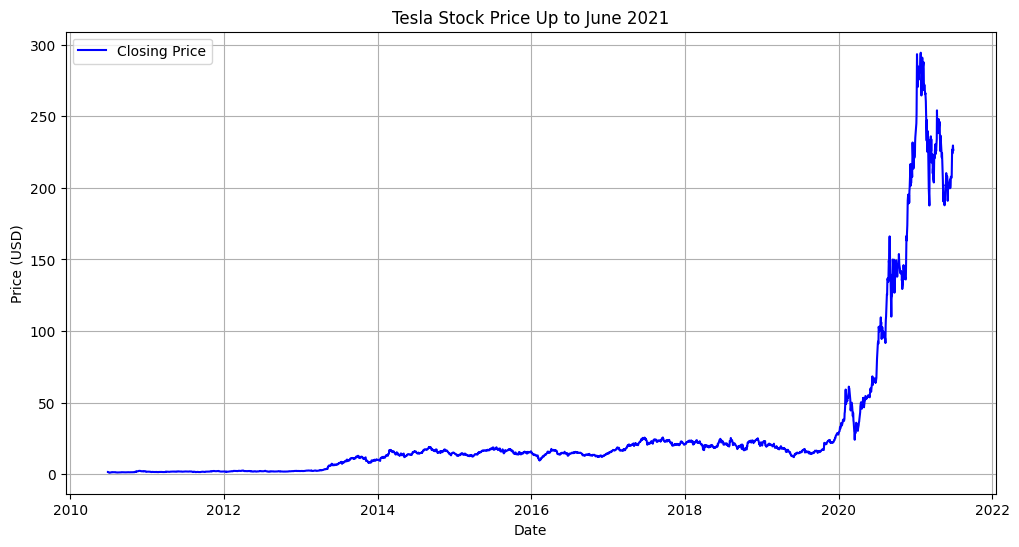

In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

# Create a ticker object for Tesla
tesla_ticker = yf.Ticker("TSLA")

# Extract stock information and save it in a DataFrame
tesla_data = tesla_ticker.history(period="max")

# Reset the index to have 'Date' as a column
tesla_data.reset_index(inplace=True)

# Filter data up to June 2021
tesla_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']

# Call the make_graph function
make_graph(tesla_data_filtered, title='Tesla Stock Price Up to June 2021')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


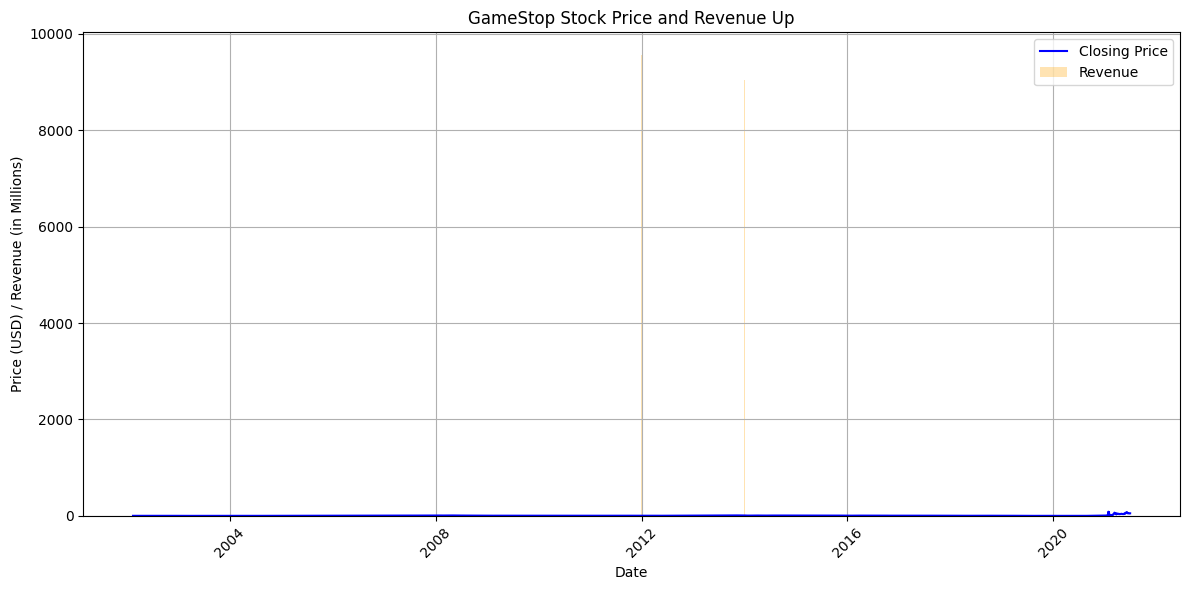

In [24]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(12, 6))
    
    # Plot stock closing price
    plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='blue')
    
    # Plot revenue as a bar chart
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], alpha=0.3, label='Revenue', color='orange')
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD) / Revenue (in Millions)')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create a ticker object for GameStop
gamestop_ticker = yf.Ticker("GME")

# Extract stock information and save it in a DataFrame
gme_data = gamestop_ticker.history(period="max")

# Reset the index to have 'Date' as a column
gme_data.reset_index(inplace=True)

# Filter data up to June 2021
gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']

# Assuming gme_revenue DataFrame is already created and contains 'Date' and 'Revenue'
# Filter gme_revenue to match the date range
gme_revenue_filtered = gme_revenue[gme_revenue['Date'] <= '2021-06-30']

# Call the make_graph function
make_graph(gme_data_filtered, gme_revenue_filtered, 'GameStop Stock Price and Revenue Up')